<a href="https://colab.research.google.com/github/AIAlchemy1/Generative-AI/blob/main/02_LangChain/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code we'll learn:

- How to use LangChain, one of the most popular library to simplify LLM interaction;
- How to add plugins to an LLM with LangChain;
- How to interact with a database using an LLM.

# LangChain

LangChain is a handy library which supplies a whole infrastucture around LLMs (both open source and available by API) allowing to quickly establish LLM-powered services. It can help you with many LLM related tasks, from prompt optimisation to creating multi-call LLM agents.

Let's see how to use LangChain. First of all, download the library:

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

open_ai_api_key = open('/content/drive/MyDrive/.open-ai-api-key.txt').read().strip()
os.environ['OPENAI_API_KEY'] = open_ai_api_key

Mounted at /content/drive


In [3]:
!pip install openai langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the

The easiest thing you can do with LangChain is just calling an LLM.  We'll do it for OpenAI API:

Note: The base model for OpenAI class is `text-davinci-003`, the significance of that will become apparent later

In [4]:
from langchain.llms import OpenAI

llm = OpenAI()

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [5]:
print(llm.predict(
    "What is the difference between cats and dogs? In two words:"
))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 instinct and domestication.

Cats and dogs are both popular domesticated pets, but they have several key differences in behavior, physical characteristics, and evolutionary history.

Instinct:

Cats and dogs have different instincts due to their evolutionary history. Cats are natural hunters and have a strong instinct to stalk and pounce on prey. This instinct is still evident in house cats, who often play with and chase small objects as if they were prey. Dogs, on the other hand, have been domesticated for thousands of years and have a stronger instinct for social hierarchy and pack mentality. This is why dogs are often more obedient and willing to follow commands from their owners.

Domestication:

Cats and dogs have been domesticated for different reasons and at different times. Cats were first domesticated around 10,000 years ago by ancient civilizations who valued them for their ability to control vermin and pests. Dogs, on the other hand, were domesticated much earlier, around 1

As you can see, the interface is already much simpler, compared to writing it on your own.

LangChain also destinguishes between LLM's and Chat models.

A difference is very subtle and mostly affect the format in which you pass data. LLM's are a pure text completion models, which means they input text and output text. Where is ChatModels work on a list of ChatMessages, which can be AIMessage, HumanMessage or SystemMessage (this difference we covered in week 1) and return an AIMessage.

Newer OpenAI only implement chat interface, for example gpt-3.5-turbo, gpt-4, etc. This means, that you cannot use them as an LLM.

Default for ChatOpenAI is `gpt-3.5-turbo`

In [6]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

chat = ChatOpenAI()
chat.predict_messages([
    HumanMessage(content="In two words what's the difference "\
        "between Cats and Dogs?")
])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `predict_messages` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


AIMessage(content='Behavior and companionship.')

Note: Draw your attention to the fact that we received a `AIMessage` instead of a string

### Prompt templates

A useful feature of LangChain is Prompt templates.

If you need to use the same prompt structure with different parameters, prompt templates can save you from the text duplication. See, for example:

In [7]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    "What is the national cousine of {country}?"
)
prompt.format(country="Australia")

'What is the national cousine of Australia?'

Now our imaginary user needs only to select a country instead of creating a whole prompt.

### Chaining

One of the main pillars of LangChain is the concept of chaining, that is of combining several LLM calls, external function calls, etc.

Much like you combine layers in neural networks, but here we have a much more diverse set of tools.

A very basic chain consists of prompt template and an LLM call. It's almost like a "function" for an LLM:

In [8]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt)
chain.run("Australia")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'\nThe national cuisine of Australia is often described as a fusion of Indigenous, European, and Asian influences. Some popular dishes and ingredients include:\n\n1. Meat pies: These are small, hand-sized pies filled with meat and gravy, typically made with beef or lamb.\n\n2. Seafood: Due to its vast coastline, seafood is a popular part of Australian cuisine. Some common dishes include fish and chips, oysters, and prawns.\n\n3. BBQ: Australians are known for their love of BBQ, with popular dishes including grilled meats, sausages, and seafood.\n\n4. Vegemite: This iconic spread made from yeast extract is a staple in Australian households and is often spread on toast or used in cooking.\n\n5. Lamingtons: These are square-shaped sponge cakes coated in chocolate and coconut, and often served at parties and events.\n\n6. Pavlova: This meringue-based dessert topped with fruit and cream is said to have originated in Australia and is a popular dish for special occasions.\n\n7. Tim Tams: Thes

Note by the way that, although we had a typo in the prompt template ("cousine" instead of "cuisine"), LLM managed to mitigate with it. You probably shouldn't rely on this too much, but generally LLMs, that are trained on data containing typos as well, can be able to cope with some amount of mistakes in the prompts.

To combine multiple calls into one function you can use `SimpleSequentialChain`. It allows you to naively pass the output of previous request as an input for another prompt template.  

In [9]:
from langchain.chains import SimpleSequentialChain

first_prompt = PromptTemplate.from_template(
    "What is the capital of {country}?"
)
first_chain = LLMChain(llm=llm, prompt=first_prompt)

second_prompt = PromptTemplate.from_template(
    "{city} is the capital of which country?"
)
second_chain = LLMChain(llm=llm, prompt=second_prompt)

simple_sequential_chain = SimpleSequentialChain(
    chains=[first_chain, second_chain],
    verbose=True
)

Intuitively now we should receive the same thing we inputted, let's try.

In [10]:
simple_sequential_chain.run("Israel")



> Entering new SimpleSequentialChain chain...


The capital of Israel is Jerusalem.


Israel

> Finished chain.


'\n\nIsrael'

If you want to make a more complicated chain with multiple inputs and outputs, you should use `SequentialChain`


In [11]:
from langchain.chains import SequentialChain

first_prompt = PromptTemplate(
    input_variables=['country', 'letter'],
    template="Name a city of {country} starting with {letter}",
)
first_chain = LLMChain(
    llm=llm,
    prompt=first_prompt,
    output_key='city'
)

second_prompt = PromptTemplate(
    input_variables=['city'],
    template="What is the main attraction in {city}?"
)
second_chain = LLMChain(
    llm=llm,
    prompt=second_prompt,
    output_key='attraction'
)

sequential_chain = SequentialChain(
    chains=[first_chain, second_chain],
    input_variables=["country", "letter"],
    output_variables=["city", "attraction"],
    verbose=True
)


In that case you'll have to pass input arguments as a dict.

In [12]:
sequential_chain({"country": "France", "letter": "P"})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new SequentialChain chain...

> Finished chain.


{'country': 'France',
 'letter': 'P',
 'city': '\n\nParis',
 'attraction': '\nThe main attraction in Paris is the Eiffel Tower.'}

# Task 1

In this task we'll learn how to rewrite ChatGPT interaction code to LangChain.

In the previous code we inplemented translate and summarise function. Rewrite it using `SequentialChain`

In [13]:
from langchain.chains import SequentialChain

summarise_prompt = PromptTemplate(
    input_variables=['text'],
    template="Write a short summary of the following text.\n{text}"
)
summarise_chain = LLMChain(
    llm=llm,
    prompt=summarise_prompt,
    output_key='summary'
)

translate_prompt = PromptTemplate(
    input_variables=['summary', 'target_language'],
    template="Translate the following text to {target_language}:\n{summary}"
)
translate_chain = LLMChain(
    llm=llm,
    prompt=translate_prompt, output_key='translation'
)

summarise_and_translate_chain = SequentialChain(
    chains=[summarise_chain, translate_chain],
    input_variables=["text", "target_language"],
    output_variables=["summary", "translation"],
    verbose=True
)

In [15]:
article = open("/content/drive/MyDrive/wikipedia_article_japanese.txt").read()

summarise_and_translate_chain(
    {'text': article, "target_language": "English"}
)



> Entering new SequentialChain chain...

> Finished chain.


{'text': '肉球\n\nページ\nノート\n閲覧\n編集\n履歴表示\n\nツール\n出典: フリー百科事典『ウィキペディア（Wikipedia）』\n曖昧さ回避\tこの項目では、ネコ目動物の足裏にある肉球について説明しています。\nお笑いタレントの肉球については「肉球 (お笑い芸人)」をご覧ください。\n印鑑・スタンプ類の商標については「にくきう」をご覧ください。\nアダルトゲームブランドについては「にくきゅう」をご覧ください。\nQuestion book-4.svg\nこの記事は検証可能な参考文献や出典が全く示されていないか、不十分です。出典を追加して記事の信頼性向上にご協力ください。（このテンプレートの使い方）\n出典検索?: "肉球" – ニュース · 書籍 · スカラー · CiNii · J-STAGE · NDL · dlib.jp · ジャパンサーチ · TWL（2015年7月）\n\nイヌの肉球\nA.爪\nB.指球/趾球\nC.掌球/足底球\nD.狼爪\nE.手根球\n肉球（にくきゅう）とは、主にネコ目（食肉目）の動物の足裏部に見られる、盛り上がった無毛の部分の名称。\n\n正式には蹠球（しょきゅう）と言うが、肉球の一部を指す「掌球」との混同を避ける目的もあり一般的に肉球と俗称される。英語では肉球の並んでいる足を指してpaw、個々の肉球をpadと呼び区別する。\n\n構造\n同様の外見・構造をしていても前足と後ろ足で名称が区別される。\n\n前足\n掌球（しょうきゅう、metacarpal pad） - 前足の裏、中央に位置する大きめの肉球。字で分かるように、人間の掌に相当する。\n指球（しきゅう、digital pad） - 掌球の外側に5つ並んだ肉球。1つは他の4つと離れて位置しており、これが人間の親指に相当する。\n手根球（しゅこんきゅう、carpal pad） - 掌球の上部、人間の手首に相当する位置にある肉球。後ろ足には類似する肉球は存在しない。\n後ろ足\n足底球（そくていきゅう、footpad） - 後ろ足の裏、中央に位置する大きめの肉球。狭義にはこの部分を蹠球と呼ぶ。\n趾球（しきゅう、digital pad） - 足底球（蹠球）の外側に4つ並んだ肉球。\n押すとぷにぷにとした独特の触感がある。外側は角質層が厚くなったも

# ChatGPT plugins and conversation memory

In this part we'll explore two cool features of LangChain: **Agents** and **Memory**. You will learn how to:

- access internet inside a chain;
- remember the conversation history and adjust to it.

**Agents** allow you to use tooling like web search, calling apis, math, python code etc. (they are known as "Plugins" in ChatBPT Web UI) to achive the goal of the given task.

**Memory** allows you to keep a state of the conversation, just like what you see in the WebUI of ChatGPT.

If you combine the two you can essentially get the same interface as ChatGPT WebUI has with plugins.

### Web search

The are plenty of search engines available. We'll try DuckDuckGo, but feel free to use any other for your projects.

Let's install the library.

In [16]:
!pip install duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 17.1 MB/s eta 0:00:00


A search engine is a **tool**. And to use it we need an **agent**:

In [17]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI
from langchain.tools import DuckDuckGoSearchRun

llm = OpenAI(temperature=0)

tools = [DuckDuckGoSearchRun()]

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


Now if we push a prompt to the agent, it will perform a well structured multi-step job that includes planning, actions and some more:

In [18]:
agent.run("What are the most famous K-pop bands?")



> Entering new AgentExecutor chain...
 I should search for this information online.
Action: duckduckgo_search
Action Input: "most famous K-pop bands"
Observation: While famous groups like BTS and Blackpink have achieved global success, there are always rising stars set on becoming the most popular K-pop group ever. Vote up the top K-pop groups of 2021, and then check out how many of these underrated K-pop groups you know! Most divisive: EXO-CBX 1 BTS Big Hit Music (HYBE Labels) 95,988 votes On this list, you'll find famous K-pop groups such as Twice, Stray Kids, Seventeen, ITZY, Aespa, and more! Which of these groups do you think deserves the number one spot? Vote up your favorite K-pop groups, and check back for updates on their 2023 releases and highlights. Most divisive: NCT 127 Photo: JYP Entertainment 1 8,014 votes Stray Kids The Top 20 Most Popular K-Pop Artists Right Now, According To Spotify Did you bias make the list? Lists Bunnie Moreau Yesterday From solo singers to groups

'BTS is widely considered the most famous and influential K-pop group, with a strong presence in the global market and a dedicated fanbase.'

**A tricky question:** where is the LLM used in this chain?

We have set the `verbose` parameter of the agent to `True`. This lets us see all the intermediate steps, and this would allow us to debug the process if something goes wrong.

### Memory

Memory allows an agent to memorize the previous interaction with the user and act according to it. Let's try to add memory and make a small conversation.

In [19]:
from langchain.agents import ZeroShotAgent, Tool, AgentExecutor
from langchain.memory import ConversationBufferMemory
from langchain import OpenAI, LLMChain


prefix = """Have a conversation with a human, answering the following """\
    """questions as best you can. You have access to the following tools:"""
suffix = """Begin!"

{chat_history}
Question: {input}
{agent_scratchpad}"""

prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix=prefix,
    suffix=suffix,
    input_variables=["input", "chat_history", "agent_scratchpad"],
)
memory = ConversationBufferMemory(memory_key="chat_history")

There are several notable features here. First of all, chat history is explicitly present in the prompt as the `chat_history` variable. Second, there is a mysterious `agent_scratchpad`. Actually, the scratchpad is not something you want to deal with: it's a medium where the artifacts of the agent's "thought process" appear.

Now, let's define the chain:


In [20]:
llm_chain = LLMChain(llm=OpenAI(), prompt=prompt)
agent = ZeroShotAgent(
    llm_chain=llm_chain,
    tools=tools,
    verbose=True
)
agent_chain = AgentExecutor.from_agent_and_tools(
    agent=agent, tools=tools, verbose=True, memory=memory
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain.agents.mrkl.base.ZeroShotAgent` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use create_react_agent instead.
  warn_deprecated(


And let's try to have a two-step conversation.

In [21]:
agent_chain.run(
    input="I want to get a cat, do you think it's a good idea?"
)



> Entering new AgentExecutor chain...
Thought: Getting a pet is a big responsibility and should not be taken lightly.
Action: duckduckgo_search
Action Input: "pros and cons of owning a cat"
Observation: 1. They Can Be Low-Maintenance As long as you change their litter box regularly and give them enough food and water, your cat will do fine. This is not to say you shouldn't spend quality time with your purring pal—you should! But cats are independent animals, and they definitely don't need constant supervision. Health Benefits Research has shown that owning a cat can have positive health effects. For example, the presence of a cat in the household can lower stress levels, reduce blood pressure, and... The 13 Pros & Cons of Owning a Cat: Important Things to Consider By Jordin Horn Last updated: Dec 21 2023 There are diehard cat people out there who will convince you that cats are the best, but those people are obviously biased. How can you tell if cats really do make the best pet for y

"It's important to carefully consider the pros and cons, prepare for ownership, and budget for the costs before deciding to get a cat."

In [22]:
agent_chain.run(
    input="I want it, what would be a good name for it?"
)



> Entering new AgentExecutor chain...
Thought: You should put some thought into the name to make sure it's a good fit for the cat's personality.
Action: duckduckgo_search
Action Input: "cat names"
Observation: Mar 25, 2023 11:12 AM EDT Adopt a new cat? Here are names for your new feline companion, ranging from cute to funny, for males and females (or unisex). Photo by Lloyd Dirks on Unsplash What Should I Name My Cat? If you're looking for names for your male or female cat, this list offers more than 400 ideas to choose from. Golden Retriever Australian Shepherd German Shepherd Pomeranian Shih Tzu Border Collie Labrador Retriever Boxer Beagle Dachshund Chihuahua Poodle Yorkshire Terrier Dog Names Best Girl Dog Names Top Boy Dog Names Unique Dog Names Cute Dog Names Best Puppy Names Dog Name Generator Tough Dog Names Food Dog Names Romantic Dog Names Find a name that suits your cat's personality, color, or food-inspired theme from this list of 195 cute cat names. Whether you have a fe

"The final answer is to choose a name that fits your cat's personality, whether they are skittish, friendly, calm, or have other unique traits."

As you can see, now our agents can remember what we said before.

You might've noticed that we've used different types of agents in those examples. We will dive deeper into agent creation in homework of this week, but we encourage you to research langchain on your own to discover even more functionality.

# Database agents

One of the promising use cases for LLM agents is interaction with a database through LLM. Imagine that you have an SQL database storing information that is used not only by analysts, but also by people who don't want to learn how to write SQL queries. In this case you could employ LLMs to:

- translate English to SQL queries and
- SQL output back to English.

### SQL made easy with LangChain

There are several modules for working with SQL in LangChain. In this session we'll use the simplest one, `SQLDatabaseChain`, and we'll look at the more sophisticated modules in the AI Safety session.

For experiments we will use the Chinook database, which is frequently used to demonstrate database functionality. We will be using the SQLite version for the simplicity of demonstration

In [24]:
!pip install langchain-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 3.4 MB/s eta 0:00:00


In [25]:
import requests
database_response = requests.get(
    "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite"
)
with open("Chinook_Sqlite.sqlite", "wb") as database_file:
    database_file.write(database_response.content)

Now the database is ready, and we will call an SQL agent. Note that we set `temperature` to zero because we want concise answers without any creativity.

In [26]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain

db = SQLDatabase.from_uri("sqlite:///Chinook_Sqlite.sqlite")
llm = OpenAI(temperature=0, verbose=True)

db_chain = SQLDatabaseChain.from_llm(
    llm,
    db,
    verbose=True,
    use_query_checker=True
)

In [27]:
db_chain.run("What tables does the database have?")



> Entering new SQLDatabaseChain chain...
What tables does the database have?
SQLQuery:SELECT name FROM sqlite_master WHERE type='table'
SQLResult: [('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]
Answer:The database has the following tables: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, and Track.
> Finished chain.


'The database has the following tables: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, and Track.'

It is that easy. Now you can you this agent to convert natural language to database quiries.

In [28]:
db_chain.run("Calculate the amount of sales for every artist "\
    "and select top 1 from each genre")



> Entering new SQLDatabaseChain chain...
Calculate the amount of sales for every artist and select top 1 from each genre
SQLQuery:SELECT Artist.Name, SUM(Invoice.Total) AS "Total Sales"
FROM Artist
INNER JOIN Album ON Artist.ArtistId = Album.ArtistId
INNER JOIN Track ON Album.AlbumId = Track.AlbumId
INNER JOIN InvoiceLine ON Track.TrackId = InvoiceLine.TrackId
INNER JOIN Invoice ON InvoiceLine.InvoiceId = Invoice.InvoiceId
WHERE Artist.Name NOT NULL
GROUP BY Artist.Name
ORDER BY "Total Sales" DESC
LIMIT 1
SQLResult: [('Iron Maiden', 1233.5400000000025)]
Answer:Iron Maiden
> Finished chain.


'Iron Maiden'

As you see, the chain works as follows:
- an LLM creates an SQL query that would give whatever the prompt asks;
- the query is pushed to the databased;
- an LLM reformulates the SQL result as a nice answer in natural language.

It's not always perfect, but it's still impressive how it can make a complex query from text.

# Vector stores

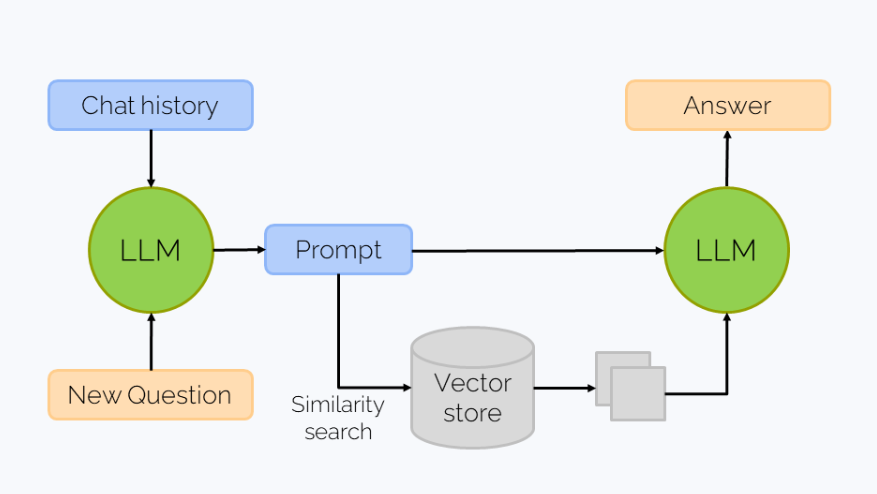

In [32]:
from IPython.display import Image
Image("/content/drive/MyDrive/langchain_vectorstore.png", width=600)

One of the goals of this week is to create your own RAG-based app. **RAG** (**R**etrieval **A**ugmented **G**eneration) is a concept of supporting a generative model with some kind of a retrieval tool which allows to get more faithful results and less hallucinations. This is crucial when we need to supply our users with facts, for example, if we're creating a navigation tool for a company's internal wiki.

Actually, we already touched upon RAG when we used DuckDuckGo. This time we'll retrieve data from a specific type of database - **vector store**.

The idea behind vector storages is to represent data items as **embeddings** (real vectors). When we receive a search query, we also somehow make it into an embedding and look for its nearest neighbors in the vector space which can be done rather quickly if somewhat approximately. If your embedding model produces vectors with strong semantic information embedded into it, you can have very high quality retrieval.

Vector storages emerged long before transformers, but because transformer models offer exceptional text understanding capabilities, using them to construct embeddings for vector storage systems is very popular. A typical AI-powered vector database query tool works like that:

- An LLM reformulates user's prompt into a vector store query;
- An embedding model is used to map the query into the database vector space;
- Vector store returns several items whose embeddings are nearest neighbors of the query's embedding;
- An LLM is used to process search results into a nice human readable output.

In this practice session you'll getting acquainted with vector databases, and in the homework you'll assemble all the pipline using LangChain.


There are quite a few vector stores available. We will employ the system called [Faiss](https://github.com/facebookresearch/faiss). It is a state-of-the-art library made by Meta for creating vector databases, which is used by a lot of production solutions.

We will use an IELTS essay dataset as a source of long texts, we want to search through.

Please make sure to put your credentials in an appropriate location following the instruction here https://github.com/Kaggle/kaggle-api#api-credentials

In [33]:
!pip install kaggle faiss-cpu tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


In [36]:
!export KAGGLE_CONFIG_DIR="/content/drive/MyDrive/" && kaggle datasets download mazlumi/ielts-writing-scored-essays-dataset

  0% 0.00/674k [00:00<?, ?B/s]
100% 674k/674k [00:00<00:00, 102MB/s]


In [37]:
!unzip ielts-writing-scored-essays-dataset.zip

Archive:  ielts-writing-scored-essays-dataset.zip
  inflating: ielts_writing_dataset.csv  


Let's look at the data:

In [38]:
import pandas

In [39]:
pandas.options.display.max_colwidth = 100
reviews = pandas.read_csv("ielts_writing_dataset.csv")
reviews.head(2).dropna(axis=1)

,Task_Type,Question,Essay,Overall
0,1,The bar chart below describes some changes about the percentage of people were born in Australia...,"Between 1995 and 2010, a study was conducted representing the percentages of people born in Aust...",5.5
1,2,"Rich countries often give money to poorer countries, but it does not solve poverty. Therefore, d...","Poverty represents a worldwide crisis. It is the ugliest epidemic in a region, which could infec...",6.5


## Text splitters

The length of the documents that we could store in a vector storage is limited by the context length of your models. The texts we work with are often longer, so we need need **Text Splitters** to cut the texts into pieces.

First of all, let's check out how big our documents are:

In [40]:
# no truncation of text
pandas.options.display.max_colwidth = 100_000_000

In [41]:
import tiktoken
import re
enc = tiktoken.get_encoding("cl100k_base")

In [42]:
rows_as_single_string = reviews.apply(
    lambda row: (re.sub(' +', ' ', row.to_string().replace("\n", " "))),
    axis=1
)
max(map(lambda text: len(enc.encode(text)), rows_as_single_string))

772

Even though this is less then 4096 max ChatGPT tokens, models typically don't undrestand long texts well enough, so it's better to split this item.

Let's create a document list for our database

In [43]:
documents = rows_as_single_string.tolist()

Let's look at a simple splitter called `CharacterTextSplitter`. It splits text on `separator` then gathers chunks based on `chunk size` as measured by a `length_function`. `chunk_overlap` controlls how much of the previous chunk we want to include in the next one for continuity.

Let's see an example.

In [44]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=32,
    chunk_overlap=4,
    length_function=lambda text: len(enc.encode(text)),
)

In [45]:
from IPython.display import display

texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people')

Document(page_content='of people were born in Australia and who were born outside Australia living in urban,')

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by')

`RecursiveCharacterTextSplitter` is very similar to `CharacterTextSplitter`, except for the splitting and gathering logic. It inputs a list of `separators` (the default is ["\n\n", "\n", " ", ""]), which it then used in the same order as in the list. That means that first we split paragraphs, then if they are bigger than `chunk_size` we split on sentences, and so on. This helps the chunks to be a bit more cohesive.

In [46]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=32,
    chunk_overlap=4,
    length_function=lambda text: len(enc.encode(text)),
    add_start_index=True,
)

In [47]:
texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural', metadata={'start_index': 0})

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant.', metadata={'start_index': 161})

Document(page_content='comparisons where relevant. Essay Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside', metadata={'start_index': 288})

Probably the most reasonable way to split is not by characters but by tokens using the model's tokenizer. LangChain supports creating a text splitter directly from tiktoken.

In [48]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=32,
    chunk_overlap=4,
    add_start_index=True
)

In [49]:
texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural', metadata={'start_index': 0})

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant. Essay Between', metadata={'start_index': 161})

Document(page_content='Essay Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside Australia, living in urban, rural,', metadata={'start_index': 316})

## Vector database creation

Let's create a database of segments of IELTS essays and examinator comments.

In [50]:
from langchain.docstore.document import Document
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=256,
    chunk_overlap=16,
    add_start_index=True
)
splitted_documents = text_splitter.create_documents(documents)
db = FAISS.from_documents(splitted_documents, OpenAIEmbeddings())

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


Now we can perform similarity search using our embeddings

In [51]:
query = "An awesome essay about bar charts"
docs = db.similarity_search(query)
docs[0].page_content

"Task_Type 1 Question The bar charts below shows the number of visits to a community website in the first and second year of use.Summarize the information by selecting and reporting the main features and mae comparisons with relevant. Essay The bar chart illustrates the quantity of visits by the thousands paid to a community website within the first two years of use.\\nOverall, there is a greater upward trend from the second year of use compared to the first year of use. In addition to that, in both years the website undergoes a drastic fluctuation in numbers. It can be observed that initially in the month of September, number of visits in the first year of use are lower than second year of use, but numbers of the former subsequently surpasses the latter in the final month of August.\\nIn regards to the first year of use, quantity of visits increases from about 2000 visits in September to 10000 visits within 2 months and remains constant for another month. Following that, numbers plumm

In [52]:
query = "A poorly written essay"
docs = db.similarity_search(query)
docs[0].page_content

'but you must offer more arguments regarding why you agree or disagree. There are many spelling, punctuation and article errors. The essay is easy to follow but has the appearance of the writer running short of time. Task_Response NaN Coherence_Cohesion NaN Lexical_Resource NaN Range_Accuracy NaN Overall 5.0'

In this code we've learned:
- How to use LangChain library.
- How to add plugins to an help an LLM excel in more complex tasks.
- How to interact with a database with an LLM.
- How to create a vector database and how to interact with it.